In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import random_center_initializer
from sklearn.decomposition import PCA

In [60]:
csv_file_path = 'C:\\Users\\yuko_\\kaggle\\advertising.csv'

In [61]:
df = pd.read_csv(csv_file_path)

In [62]:
print(df.head())
print(df.info())
print(df.describe())

   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02  

クラスタ数:
Cluster
 3    267
 0    250
 1    250
 2    227
-1      6
Name: count, dtype: int64


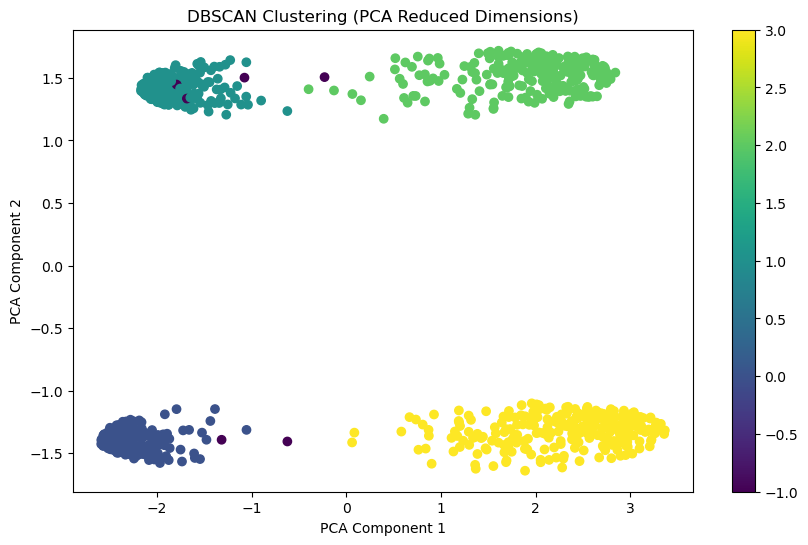

クラスタごとの特徴 (昇順):
         Daily Time Spent on Site        Age   Area Income  \
Cluster                                                      
-1                      70.821667  35.666667  39213.011667   
 0                      77.000120  32.004000  62275.797360   
 1                      76.709120  31.364000  60495.375480   
 2                      51.354449  40.748899  49200.572555   
 3                      54.271536  40.086142  48327.336442   

         Daily Internet Usage      Male  Clicked on Ad  Cluster      PCA1  \
Cluster                                                                     
-1                 244.890000  0.666667            1.0     -1.0 -1.119887   
 0                 214.623440  0.000000            0.0      0.0 -2.304014   
 1                 214.404040  1.000000            0.0      1.0 -1.851678   
 2                 143.764273  1.000000            1.0      2.0  1.898857   
 3                 144.716854  0.000000            1.0      3.0  2.301879   

         

In [90]:
# 欠損値の削除
df = df.dropna()

# 数値型の列名を取得
numeric_columns = df.select_dtypes(include=[np.number]).columns

# 数値データの標準化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# DBSCAN実行
dbscan = DBSCAN(eps=2, min_samples=20)
df['Cluster'] = dbscan.fit_predict(scaled_data)

print("クラスタ数:")
print(df['Cluster'].value_counts())

# PCAで2次元に次元削減
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# PCAの結果をデータフレームに追加
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# クラスタリングの視覚化
plt.figure(figsize=(10, 6))

# クラスタのラベルごとに色分け
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', marker='o')

# カラーバーの表示
plt.colorbar(scatter)

plt.title("DBSCAN Clustering (PCA Reduced Dimensions)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# 数値型の列をクラスタごとに平均計算
cluster_attributes = df[numeric_columns].groupby(df['Cluster']).mean()

# 昇順に並べる
cluster_attributes_sorted = cluster_attributes.sort_index(axis=0, ascending=True)

# クラスタごとの特徴を表示
print("クラスタごとの特徴 (昇順):")
print(cluster_attributes_sorted)

# クラスタごとのデータを表示（昇順）
for cluster in cluster_attributes_sorted.index:
    print(f"\nCluster {cluster} のデータ:")
    cluster_data = df[df['Cluster'] == cluster]
    print(cluster_data.head())

・クラスタ0
サイト滞在時間：長い
インターネット使用：多い
性別：女性
年齢：20-30代
クリック：なし
→全クラスタの中で一番インターネット使用が多いがクリックはされていない。

・クラスタ1
サイト滞在時間：長い
インターネット使用：多い
性別：男性
年齢：20-30歳
クリック：なし
→全クラスタの中で一番年齢層が低く性別は男性であるクラスタからはクリックされていない。

・クラスタ2
サイト滞在時間：やや長い
インターネット使用：少
性別：男性
年齢：ばらつきあり
クリック：あり
エリア収入：低
→全クラスタの中で一番エリア収入が低い男性のクラスタ。広告をクリックしたクラスタ。インターネット使用は少ないがサイト滞在は長い。

・クラスタ3
サイト滞在時間：短
インターネット使用：少
性別：女性
年齢：ばらつきあ
クリック：あり
エリア収入：低
→全クラスタの中で一番サイト滞在時間が短いが、クリックしている。

まとめ
・クラスタ0とクラスタ3はどちらも女性であるが記事内容はビジネス寄りだったため、クラスタ0は専業主婦層でクラスタ3は働いている女性？
・クラスタ1とクラスタ2はどちらも男性ではあるが、クラスタ1は圧倒的に年齢層が低い。若者にはささらない？
・クラスタ2とクラスタ3は性別は違うが、インターネット使用時間とエリア収入が低い。職、経済状況、自由時間に関する悩みがある層の方がクリック率が高い？

→男性に向けるなら中年以降の年齢層・経済的に困窮している層がクリックしやすい